This notebook shows an implementation of the epsilon "soft" support vector regression on a dataset of points that follows a linear function.

**Model:**

Now we add slack variables to the problem to account for cases in which the data in not in an epsilon border of the "true" function. The model is now:

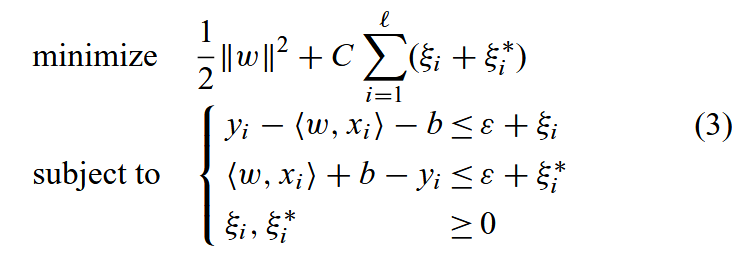

**Remarks:**
- For the "soft" epsilon border version we use the already existing implementation from `scikit-learn`.

In [51]:
%load_ext autoreload
%autoreload 2

# Thrird party libraries imports
import numpy as np
from sklearn.svm import LinearSVR

# Local imports
from sv_machines.datasets.line import get_line_dataset, get_line_plot, add_line_outliers
from sv_machines.datasets.utils import add_prediction_function_to_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load a line dataset

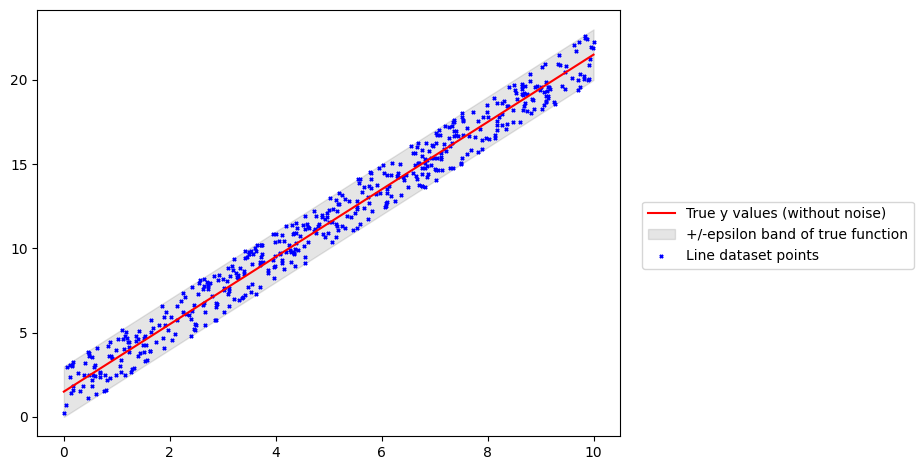

In [52]:
slope, offset, epsilon = 2.0, 1.5, 1.5

x_line, y_line = get_line_dataset(
    slope=slope, offset=offset, epsilon=epsilon, num_points=500, epsilon_strict=True
)
fig, ax = get_line_plot(x_line, y_line, slope, offset, epsilon, with_true_function=True)
fig.tight_layout()
fig.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Perfom $\varepsilon$ "soft" support vector regression on the dataset

We perform it with different values of $C$ and $\varepsilon$. Notice how when $C$ becomes too low, the minimization of $\|\omega\|^2$ take more "importance" relatively to the errors and the prediction function output is just flat but very far away from the data.

-----------------------------
LinearSVR: C=1, epsilon=1.6
-----------------------------

Regression function : y=[2.00298078]*x+[1.37009915] 

-----------------------------
LinearSVR: C=1, epsilon=2
-----------------------------

Regression function : y=[2.00294935]*x+[0.97009445] 

-----------------------------
LinearSVR: C=0.1, epsilon=2
-----------------------------

Regression function : y=[2.02350728]*x+[0.85040724] 

-----------------------------
LinearSVR: C=0.001, epsilon=2
-----------------------------

Regression function : y=[1.79578697]*x+[0.30696144] 

-----------------------------
LinearSVR: C=0.0001, epsilon=2
-----------------------------

Regression function : y=[0.25158468]*x+[0.0487] 

-----------------------------
LinearSVR: C=1e-05, epsilon=2
-----------------------------

Regression function : y=[0.02516671]*x+[0.00488] 



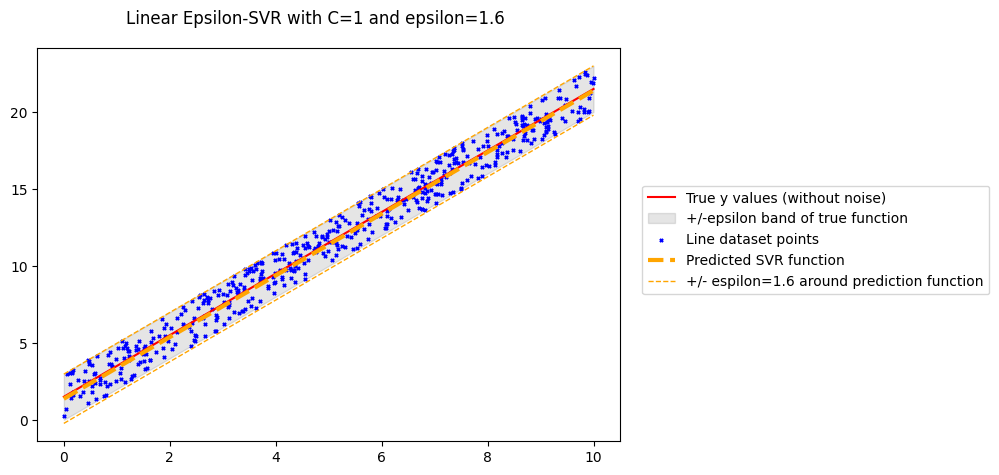

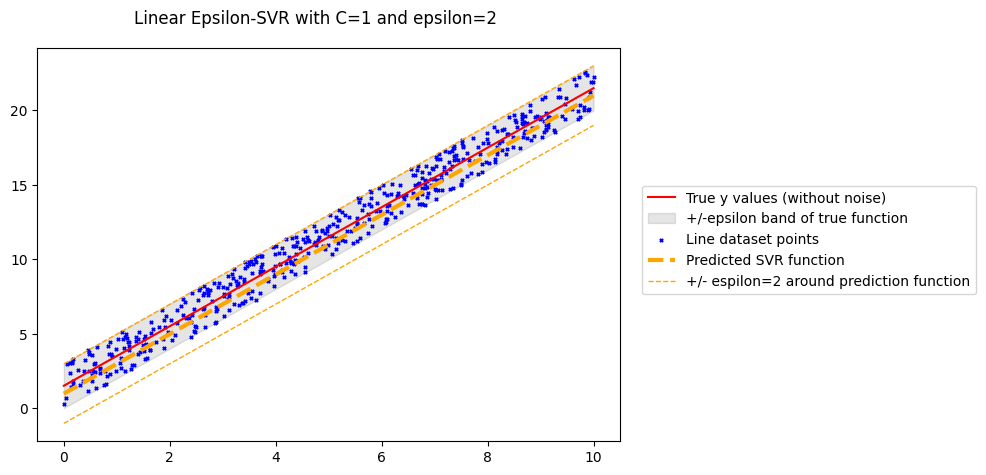

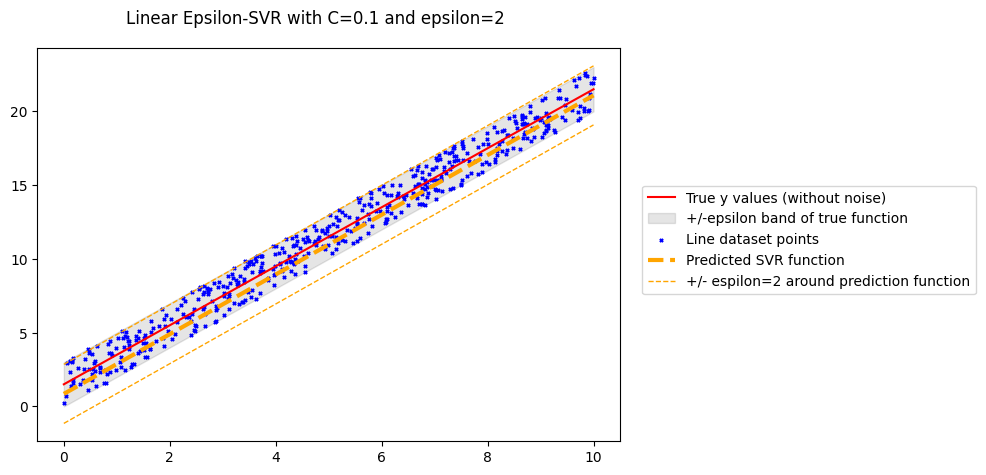

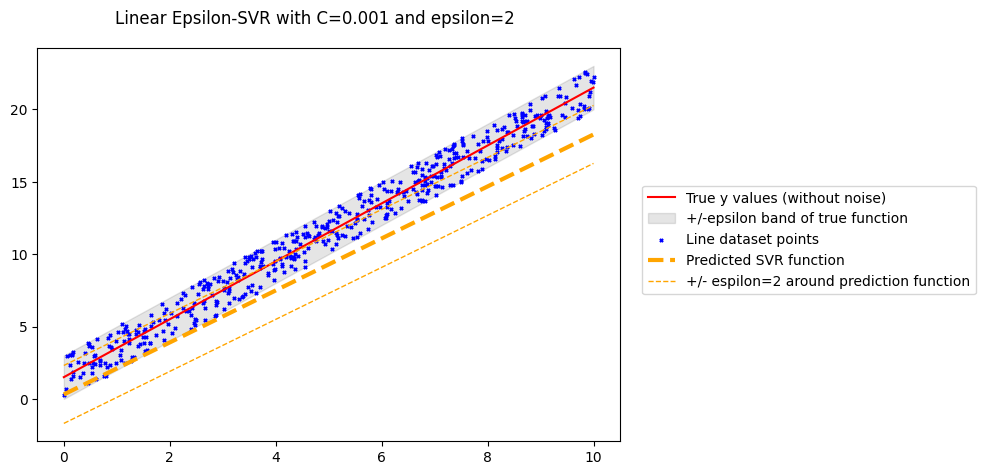

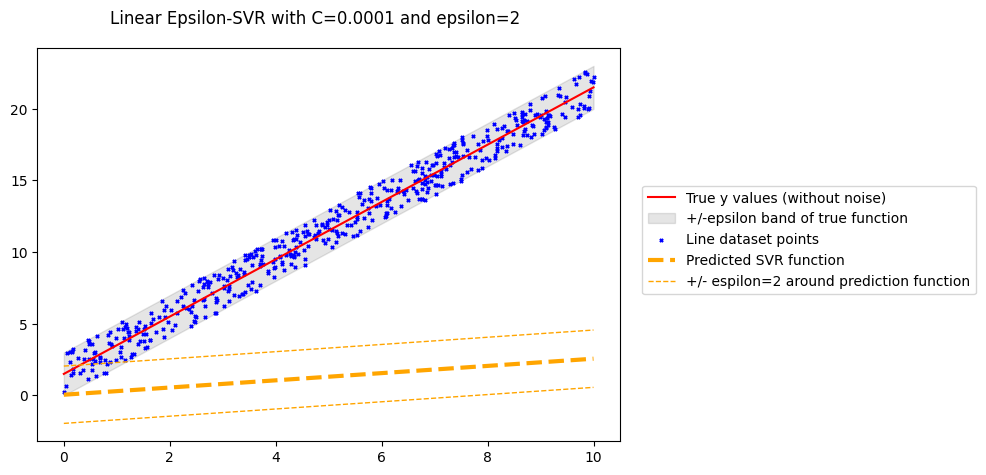

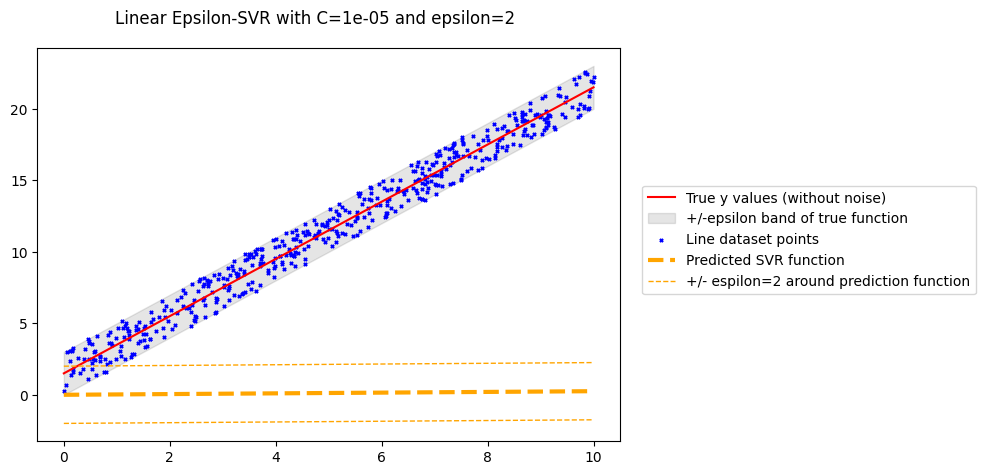

In [53]:
for C, eps in [
    (1, 1.6),
    (1, 2),
    (10**-1, 2),
    (10**-3, 2),
    (10**-4, 2),
    (10**-5, 2),
]:
    print(
        f"-----------------------------\nLinearSVR: C={C}, epsilon={eps}\n-----------------------------\n"
    )
    model = LinearSVR(epsilon=eps, C=C, max_iter=10000)
    y_regression = model.fit(x_line.reshape(-1, 1), y_line)
    print(f"Regression function : y={model.coef_}*x+{model.intercept_} \n")
    fig, ax = get_line_plot(
        x_line, y_line, slope, offset, epsilon, with_true_function=True
    )

    add_prediction_function_to_plot(
        ax=ax,
        x_dataset=x_line.reshape(-1, 1),
        prediction_function=model.predict,
        epsilon=eps,
        prediction_function_label="Predicted SVR function",
    )
    fig.suptitle(f"Linear Epsilon-SVR with C={C} and epsilon={eps}")
    fig.tight_layout()
    fig.legend(loc="center left", bbox_to_anchor=(1, 0.5))

Same but with `SVR` instead of `LinearSVR` because `LinearSVR` does not expose the dual and thus we cannot access the slack variables values with it.

-----------------------------
SVR: C=1, epsilon=1
-----------------------------

Regression function : y=[[1.98294527]]*x+[1.64865496] 

Dual coeffs: [[ 1.         -1.         -1.         -1.          1.         -1.
   1.         -1.          1.         -1.          1.         -1.
  -1.         -1.          1.          1.          1.         -1.
   1.         -1.          1.         -1.         -1.          1.
  -1.         -1.          1.          1.         -1.         -1.
  -1.         -1.          1.          1.         -0.98967978  1.
   1.         -1.         -1.          1.          1.         -1.
  -1.         -1.         -1.          1.         -1.         -1.
  -1.         -1.          1.         -1.          1.          1.
  -1.         -1.          1.         -1.         -1.         -1.
  -1.          1.         -1.          1.          1.          1.
  -1.          1.         -1.          1.          1.         -1.
  -1.          1.         -1.          1.          1.     

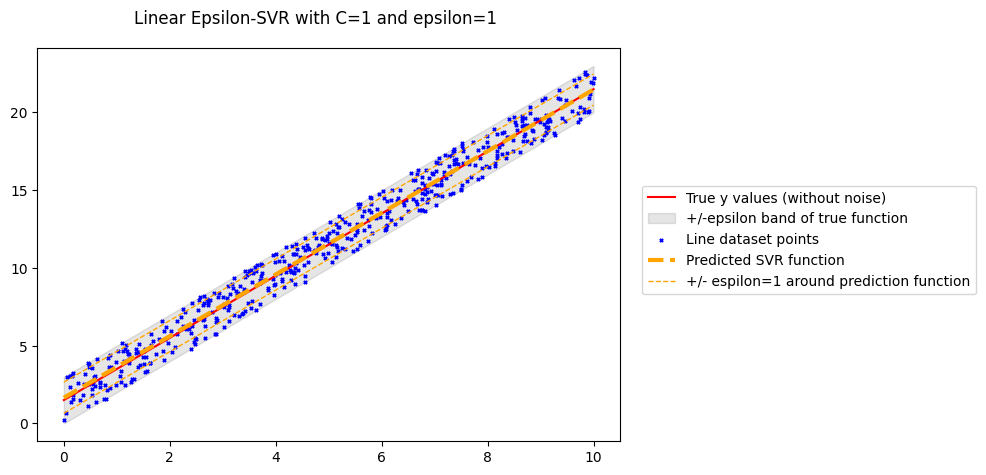

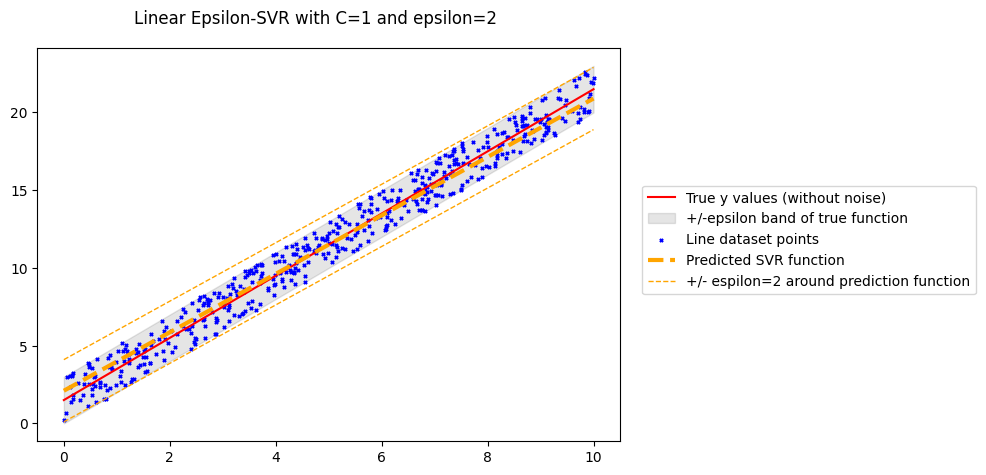

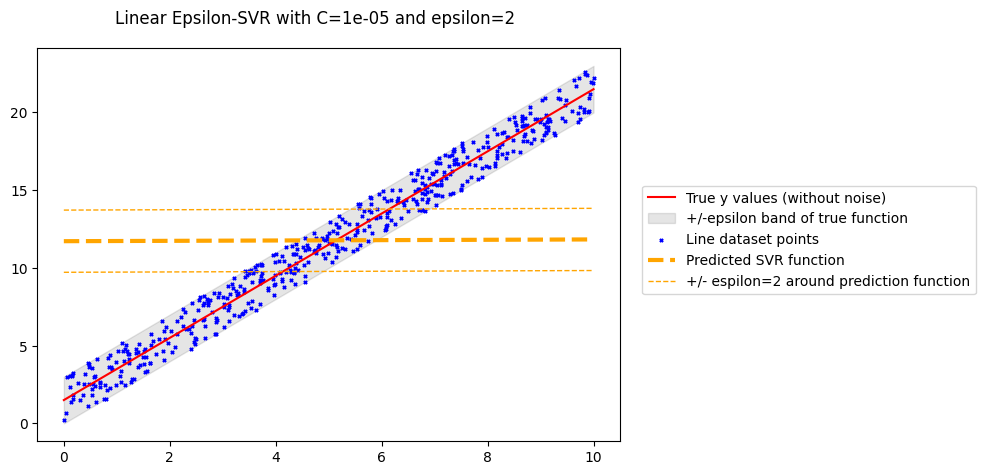

In [54]:
from sklearn.svm import SVR

for C, eps in [
    (1, 1),
    (1, 2),
    (10**-5, 2),
]:
    print(
        f"-----------------------------\nSVR: C={C}, epsilon={eps}\n-----------------------------\n"
    )
    model = SVR(epsilon=eps, kernel="linear", C=C, max_iter=10000)
    y_regression = model.fit(x_line.reshape(-1, 1), y_line)
    print(f"Regression function : y={model.coef_}*x+{model.intercept_} \n")
    fig, ax = get_line_plot(
        x_line, y_line, slope, offset, epsilon, with_true_function=True
    )

    add_prediction_function_to_plot(
        ax=ax,
        x_dataset=x_line.reshape(-1, 1),
        prediction_function=model.predict,
        epsilon=eps,
        prediction_function_label="Predicted SVR function",
    )
    fig.suptitle(f"Linear Epsilon-SVR with C={C} and epsilon={eps}")
    fig.tight_layout()
    fig.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    print("Dual coeffs:", model.dual_coef_)

# Line dataset with datapoints outside of the +/- $\varepsilon$ band

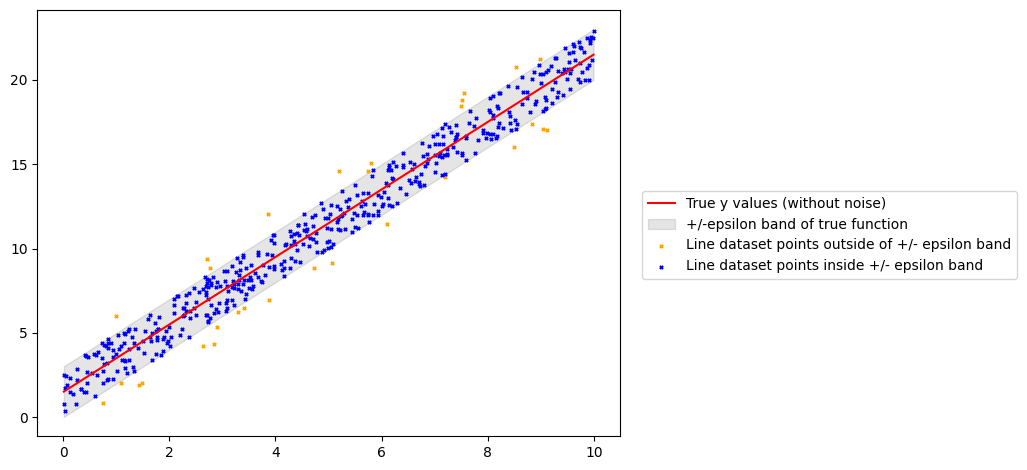

In [49]:
x_line_with_outliers, y_line_with_outliers, outliers_indexes = add_line_outliers(
    x_line,
    y_line,
    slope=slope,
    offset=offset,
    epsilon=epsilon,
    num_outliers=30,
    outlier_max_distance=epsilon * 2,
)

fig_outliers, ax_outliers = get_line_plot(
    x_line_with_outliers,
    y_line_with_outliers,
    slope=slope,
    offset=offset,
    epsilon=epsilon,
    with_true_function=True,
    outliers_indexes=outliers_indexes,
)
fig_outliers.legend(loc="center left", bbox_to_anchor=(1, 0.5))